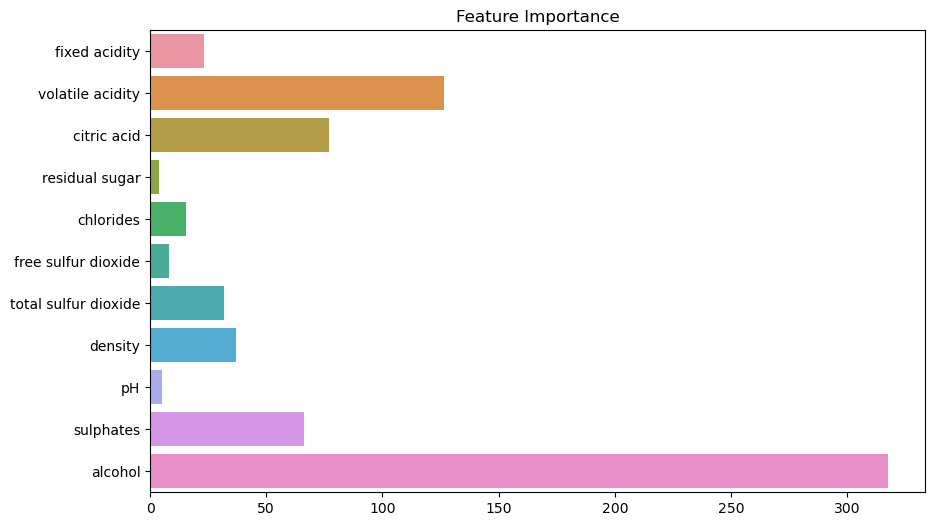

Best Parameters: {'criterion': 'entropy', 'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       273
           1       0.56      0.32      0.41        47

    accuracy                           0.86       320
   macro avg       0.72      0.64      0.66       320
weighted avg       0.84      0.86      0.85       320



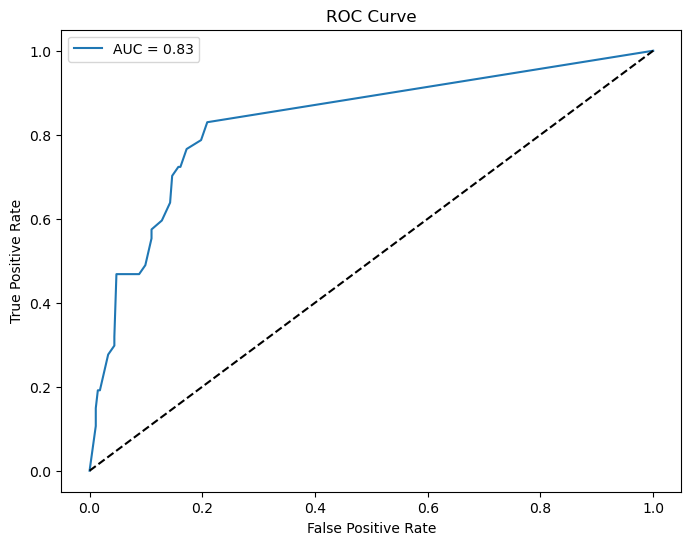

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns


url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Red%20Wine/winequality-red.csv'
data = pd.read_csv(url)


data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)

X = data.drop('quality', axis=1)
y = data['quality']



selector = SelectKBest(f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_



plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=X.columns)
plt.title('Feature Importance')
plt.show()




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
clf.fit(X_train, y_train)




best_clf = clf.best_estimator_
y_pred = best_clf.predict(X_test)
y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

print("Best Parameters:", clf.best_params_)
print(classification_report(y_test, y_pred))

# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
